In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/Predator/Desktop/Lauti/Programación/GitHub/2. Data Analytics/#2/datasets/olist_order_items_dataset.csv")
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### **Missing values**

In [3]:
df.info() # There are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [4]:
columns = df.columns.to_list()
for i in columns:
    print(f"faltantes en {i}: =======> {df[i].isna().sum()} en porcentaje: {round((df[i].isna().sum() / df.shape[0])*100, 2)}%")

faltantes en order_id: =======> 0 en porcentaje: 0.0%
faltantes en order_item_id: =======> 0 en porcentaje: 0.0%
faltantes en product_id: =======> 0 en porcentaje: 0.0%
faltantes en seller_id: =======> 0 en porcentaje: 0.0%
faltantes en shipping_limit_date: =======> 0 en porcentaje: 0.0%
faltantes en price: =======> 0 en porcentaje: 0.0%
faltantes en freight_value: =======> 0 en porcentaje: 0.0%


### **Duplicated values**

In [5]:
df[df.duplicated(subset=["order_id"])]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
43,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
44,001ab0a7578dd66cd4b0a71f5b6e1e41,3,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
...,...,...,...,...,...,...,...
112617,ffecd5a79a0084f6a592288c67e3c298,3,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,2018-03-05 20:15:27,21.90,15.79
112635,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19


In [6]:
df[df["order_id"]=="fffb9224b6fc7c43ebb0904318b10b5f"]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
112640,fffb9224b6fc7c43ebb0904318b10b5f,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.0,34.19
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.0,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.0,34.19
112643,fffb9224b6fc7c43ebb0904318b10b5f,4,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.0,34.19


In [7]:
print("Quantity of duplicated values: ", df.duplicated(subset=["order_id"]).sum())

Quantity of duplicated values:  13984


### **Outliers & atipic values**

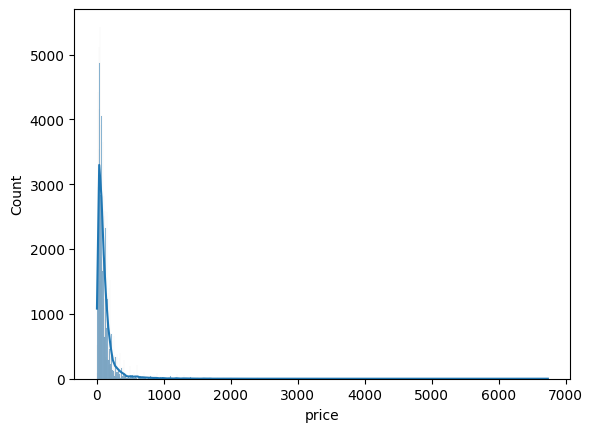

In [8]:

sns.histplot(x='price', data=df, kde=True)
plt.show()


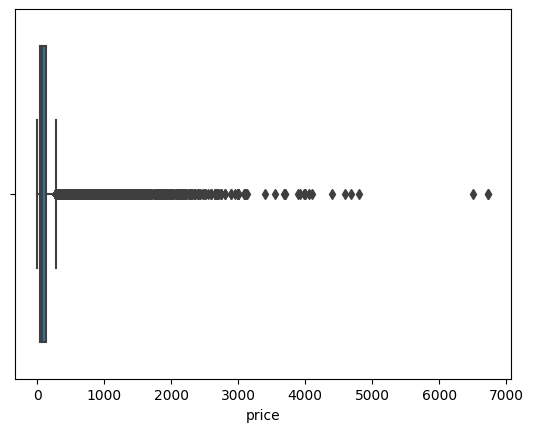

In [9]:
sns.boxplot(x='price', data=df)
plt.show()


In [10]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR

print(Q1)
print(Q3)
print(IQR)
print(BI)
print(BS)

39.9
134.9
95.0
-102.6
277.4


In [11]:
print('Total quantity registers:', df.shape[0])
print('Quantity of outliers:', df[(df['price']<BI) | (df['price']>BS)].shape[0] )

Total quantity registers: 112650
Quantity of outliers: 8427


In [12]:
# Eliminating outliers

out = (df['price'] < BI) | (df['price'] > BS)

df = df[~out]


In [13]:
print('Dataset size, after eliminating outliers in "price":', df.shape[0])

Dataset size, after eliminating outliers in "price": 104223


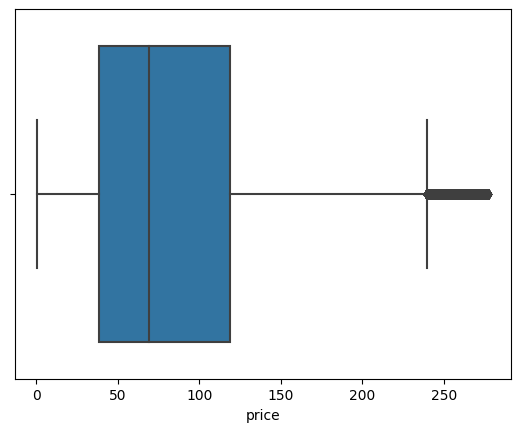

In [14]:
# We prove that, doing a first elimination of outliers, the quantity of extreme values is considerably reduced now

sns.boxplot(x='price', data=df)
plt.show()


In [15]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR

print(Q1)
print(Q3)
print(IQR)
print(BI)
print(BS)

38.5
118.99
80.49
-82.23499999999999
239.72499999999997


In [16]:
# Eliminating outliers

fuera = (df['price'] < BI) | (df['price'] > BS)

df = df[~fuera]

In [17]:
print('Dataset size, after eliminating outliers in "price":', df.shape[0])

Dataset size, after eliminating outliers in "price": 102110


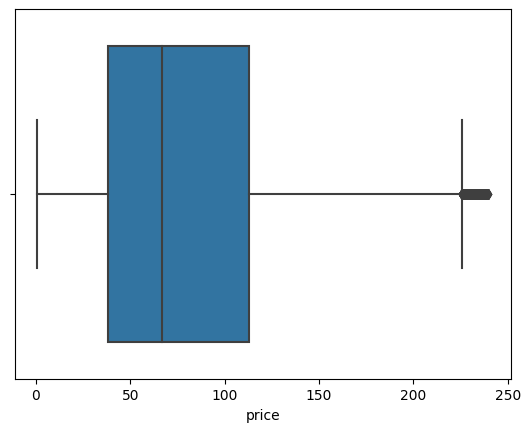

In [18]:
sns.boxplot(x='price', data=df)
plt.show()

In [19]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR

print(Q1)
print(Q3)
print(IQR)
print(BI)
print(BS)

37.99
113.0
75.00999999999999
-74.52499999999998
225.515


In [20]:
# Eliminating outliers

out = (df['price'] < BI) | (df['price'] > BS)

df = df[~out]

print('Dataset size, after eliminating outliers in "price":', df.shape[0])


Dataset size, after eliminating outliers in "price": 101106


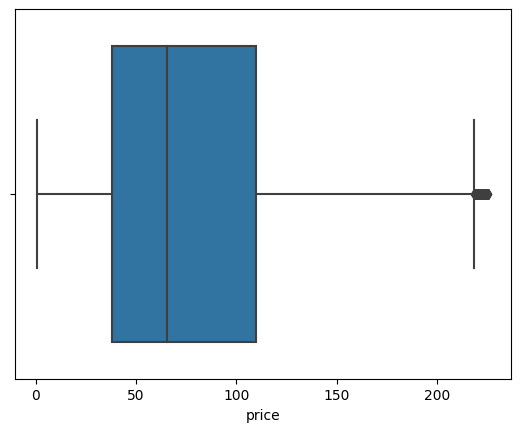

In [21]:
sns.boxplot(x='price', data=df)
plt.show()